# Strava Analysis

I had never used Python to create a dashboard, so wanted to give it a go. So I decide to analyse my own Strava data. 

[You can request a bulk export of your data here.](https://support.strava.com/hc/en-us/articles/216918437-Exporting-your-Data-and-Bulk-Export)

Below you can find the code / notebook I used to do the analysis first. 

In [107]:
# set up and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

# display all the columns in the dataset print outs
pd.options.display.max_columns = None

# read the data in 
act_df = pd.read_csv('data/activities.csv')

# do some data cleaning of the column names
act_df.columns = act_df.columns.str.lower()
act_df.columns = act_df.columns.str.replace(' ', '_')

# only select the columns I want 
df2 = (
    act_df
    .filter(regex = 'activity|distance|commute|time|speed|elevation|grade|temperature')
    .copy()
    .assign(year = pd.DatetimeIndex(df2['activity_date']).year, 
            month = pd.DatetimeIndex(df2['activity_date']).month, 
            month_label = df2['month'].apply(lambda x: calendar.month_abbr[x]),
            time_minutes = df2['moving_time']/60,
            time_hours = df2['moving_time']/3600)
)

df2.drop(columns = list(df2.filter(regex='span_class')), inplace = True)

In [108]:
# total number of each over all years
df3 = (
    df2
    .groupby(['activity_type'])['activity_id']
    .count()
    .reset_index(name="count")
    .sort_values('count', ascending = False)
)

# most popular activity each year
all_years = (
    df2
    .groupby(['activity_type', 'year'])['activity_id']
    .count()
    .reset_index(name="count")
    .sort_values(['activity_type','year','count'], ascending = (True,True,False))
)

In [109]:
# total distance and number of rides each year
year_data = (
    df2
    .query("activity_type == 'Ride'")
    .groupby('year')
    .agg(distance_sum = ('distance','sum'), 
         total_rides = ('activity_id', 'count'), 
         time_spent = ('elapsed_time', 'sum'),
         time_spent_moving = ('moving_time', 'sum'),
         mtime_hours = ('time_hours', 'sum'),
         total_elevation = ('elevation_gain', 'sum'), 
         total_commutes = ('commute', 'sum'))
    .reset_index()     
)

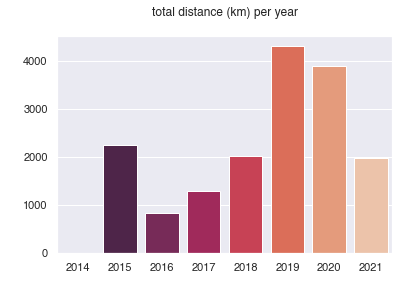

In [110]:
sns.set(font='Helvetica')
sns.set_style()

sns.barplot(x = 'year', y = 'distance_sum', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total distance (km) per year\n');

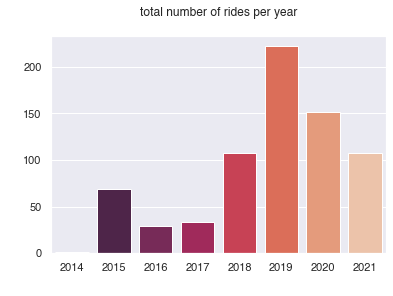

In [111]:
sns.barplot(x = 'year', y = 'total_rides', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total number of rides per year\n');

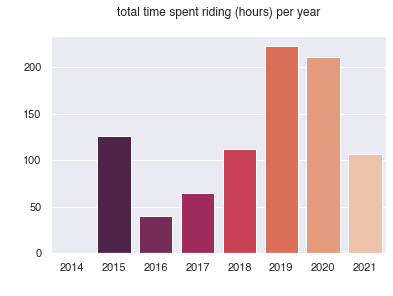

In [112]:
sns.barplot(x = 'year', y = 'mtime_hours', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total time spent riding (hours) per year\n');

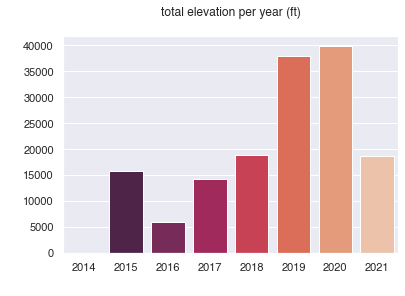

In [113]:
sns.barplot(x = 'year', y = 'total_elevation', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total elevation per year (ft)\n');

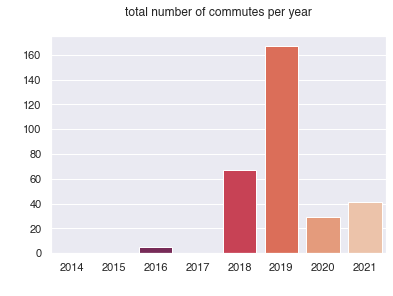

In [114]:
sns.barplot(x = 'year', y = 'total_commutes', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total number of commutes per year\n');

In [115]:
dfm = year_data.melt(
    id_vars='year', 
    var_name='category',
    value_name='value'
)

In [116]:
# g = sns.FacetGrid(dfm, col="category", col_wrap=3)
# g.map_dataframe(sns.barplot, x="year", y = 'value')

In [117]:
month_data = (
    df2
    .query("activity_type == 'Ride'")
    .groupby(['month','month_label'])
    .agg(distance_sum = ('distance','sum'), 
         total_rides = ('activity_id', 'count'), 
         time_spent = ('elapsed_time', 'sum'),
         time_spent_moving = ('moving_time', 'sum'),
         total_elevation = ('elevation_gain', 'sum'), 
         total_commutes = ('commute', 'sum'),
         mtime_hours = ('time_hours', 'sum'))
    .sort_values('month', ascending = True)
    .reset_index()     
)

month_data

,month,month_label,distance_sum,total_rides,time_spent,time_spent_moving,total_elevation,total_commutes,mtime_hours
0,1,Jan,975.29,45,204949,184920.0,6236.475760,24,51.366667
1,2,Feb,820.84,55,188654,158808.0,6504.437423,31,44.113333
2,3,Mar,939.39,48,218520,181816.0,8512.417587,25,50.504444
3,4,Apr,1811.35,73,455948,349611.0,19641.503378,18,97.114167
4,5,May,2102.74,69,625104,429055.0,21404.760775,14,119.181944
5,6,Jun,1560.24,72,376902,292406.0,14444.988598,30,81.223889
6,7,Jul,1594.88,80,391655,302514.0,13799.420811,45,84.031667
7,8,Aug,1929.82,89,504117,376028.0,19341.018459,34,104.452222
8,9,Sep,2319.99,76,719821,430489.0,17798.531918,34,119.580278
9,10,Oct,1232.81,50,284687,234524.0,12161.359146,24,65.145556


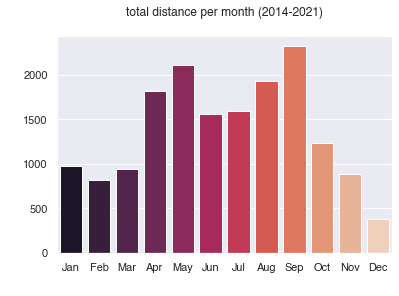

In [118]:
sns.barplot(x = 'month_label', y = 'distance_sum', data = month_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total distance per month (2014-2021)\n');

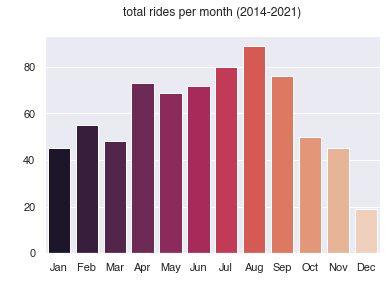

In [119]:
sns.barplot(x = 'month_label', y = 'total_rides', data = month_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total rides per month (2014-2021)\n');

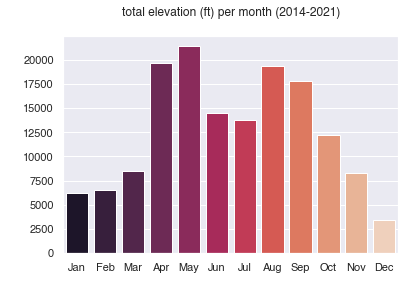

In [120]:
sns.barplot(x = 'month_label', y = 'total_elevation', data = month_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total elevation (ft) per month (2014-2021)\n');


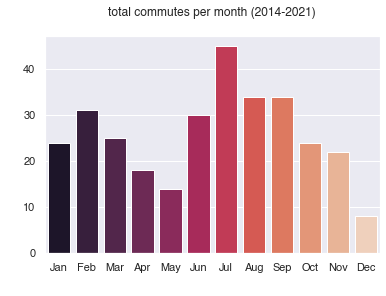

In [121]:
sns.barplot(x = 'month_label', y = 'total_commutes', data = month_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total commutes per month (2014-2021)\n');


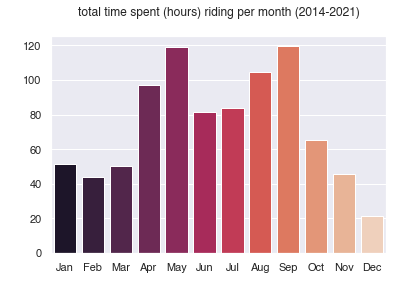

In [122]:
sns.barplot(x = 'month_label', y = 'mtime_hours', data = month_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total time spent (hours) riding per month (2014-2021)\n');

In [123]:
!jupyter nbconvert strava_analysis.ipynb --to html --template classic

[NbConvertApp] Converting notebook strava_analysis.ipynb to html
[NbConvertApp] Writing 307486 bytes to strava_analysis.html
